<a href="https://colab.research.google.com/github/Mar-celo/Enap/blob/master/001_enap_grid_search_text_feature_extraction_Fernando_tcu_jurisp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Sklearn - NLP Text classification
## Jurisprudências TCU

Fernando Melo  
22/7/2020


### Tokenization: processo de dividir um texto em palavras (tokens) separadas.  
'Fui para os bosques viver de livre vontade.'   
[ 'Fui', 'para', 'os', 'bosques', 'viver', 'de', 'livre', 'vontade', '.' ]  
  
### Numericalization: converter cada token em número.  
'Fui', 'para', 'os', 'bosques', 'viver', 'de', 'livre', 'vontade', '.'   
[ 0,1,2,3,4,5,6,7,8,9 ]  

### Bag of words (sklearn CountVectorizer)
Bag of words: converte cada token único em um número inteiro.  
Problema: Ordem das palavras não importa.  
  
“It was the best of times”  
“It was the worst of times”  
“It was the age of wisdom”  
“It was the age of foolishness”  
   
dicionário: ‘It’, ‘was’, ‘the’, ‘best’, ‘of’, ‘times’, ‘worst’, ‘age’, ‘wisdom’, ‘foolishness’  
  
cria vetores para cada frase:  
“It was the best of times” = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0]  
“It was the worst of times” = [1, 1, 1, 0, 1, 1, 1, 0, 0, 0]  
“It was the age of wisdom” = [1, 1, 1, 0, 1, 0, 0, 1, 1, 0]  
“It was the age of foolishness” = [1, 1, 1, 0, 1, 0, 0, 1, 0, 1]  
  
n-grams:  
gram: cada token é um 'gram':  
‘It’, ‘was’, ‘the’, ‘best’, ‘of’, ‘times’   
bigram : “it was”, “was the”, “the best”, “best of”, “of times”  
trigram : “It was the", "was the best", "the best of", "best of times"  

In [ ]:
# No sklearn usamos CountVectorizer
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
# lista de documentos
text = ['O tempo é muito lento para os que esperam',
        'Muito rápido para os que têm medo',
        'Muito longo para os que lamentam',
        'Muito curto para os que festejam',
        'Mas, para os que amam e amam, o tempo é eterno.']
# instancia o transform CountVectorizer
vectorizer = CountVectorizer()
# tokeniza e cria o vocabulário
vectorizer.fit(text)
# mostra o vocabulário criado
print('Vocabulário: ')
print(vectorizer.vocabulary_)
# converte em números
print('\ndimensões da matrix: ')
vector = vectorizer.transform(text)
# # mostra as dimensões da matrix de frequência
# print(vector.shape)
# # mostra os documentos codificados
# print(vector.toarray())
# mostra os documentos codificados
values = vectorizer.transform(text)
feature_names = vectorizer.get_feature_names()
print('\n',text[0])
pd.DataFrame(values.toarray(), columns = feature_names)

Vocabulário: 
{'tempo': 15, 'muito': 10, 'lento': 6, 'para': 12, 'os': 11, 'que': 13, 'esperam': 2, 'rápido': 14, 'têm': 16, 'medo': 9, 'longo': 7, 'lamentam': 5, 'curto': 1, 'festejam': 4, 'mas': 8, 'amam': 0, 'eterno': 3}

dimensões da matrix: 

 O tempo é muito lento para os que esperam


,amam,curto,esperam,eterno,festejam,lamentam,lento,longo,mas,medo,muito,os,para,que,rápido,tempo,têm
0,0,0,1,0,0,0,1,0,0,0,1,1,1,1,0,1,0
1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1
2,0,0,0,0,0,1,0,1,0,0,1,1,1,1,0,0,0
3,0,1,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0
4,2,0,0,1,0,0,0,0,1,0,0,1,1,1,0,1,0


### TF-IDF Term frequency — Inverse document frequency 
(sklearn TfidfVectorizer)  
TF-IDF() é um método estatístico utilizado para avaliar a importância de uma palavra em determinado documento.  
  
TF - Frequência dos termos: fé a frequência que uma palavra aparece em um texto, divido pelo número total de palavras.  
  
IDF - Frequência inversa de documentos: é a pontuação de quão interessante (rara) é a palavra no texto. reduz as palavras que aparecem muito nos documentos. Sem entrar na matemática, TF-IDF são pontuações de frequência de palavras que tentam destacar palavras mais interessantes, freqüentes em um documento, mas raras entre outros documentos. Ou seja, diminui o peso das sentenças que ocorrem com mais frequência no conjunto de textos selecionados, ao mesmo tempo que aumenta o peso daqueles que ocorrem raramente.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# instancia o transform CountVectorizer
tfidf_vectorizer = TfidfVectorizer()
# tokeniza e cria o vocabulário
tfidf_vectorizer.fit(text)
# mostra o vocabulário criado
print('Vocabulário: ')
print(tfidf_vectorizer.vocabulary_)
print('\nPeso de cada palavra do vocabulário: ')
print(tfidf_vectorizer.idf_)
# encode document
tfidf_vector = tfidf_vectorizer.transform(text)
# mostra as dimensões da matrix de frequência
print('\nDimensões da matrix: ')
print(tfidf_vector.shape)
# mostra os documentos codificados
val = tfidf_vectorizer.fit_transform(text)
feature_names = tfidf_vectorizer.get_feature_names()
print('\n',text[0])
pd.DataFrame(val.toarray(), columns = feature_names)
# print(tfidf_vector.toarray())

Vocabulário: 
{'tempo': 15, 'muito': 10, 'lento': 6, 'para': 12, 'os': 11, 'que': 13, 'esperam': 2, 'rápido': 14, 'têm': 16, 'medo': 9, 'longo': 7, 'lamentam': 5, 'curto': 1, 'festejam': 4, 'mas': 8, 'amam': 0, 'eterno': 3}

Peso de cada palavra do vocabulário: 
[2.09861229 2.09861229 2.09861229 2.09861229 2.09861229 2.09861229
 2.09861229 2.09861229 2.09861229 2.09861229 1.18232156 1.
 1.         1.         2.09861229 1.69314718 2.09861229]

Dimensões da matrix: 
(5, 17)

 O tempo é muito lento para os que esperam


,amam,curto,esperam,eterno,festejam,lamentam,lento,longo,mas,medo,muito,os,para,que,rápido,tempo,têm
0,0.000000,0.000000,0.523461,0.000000,0.000000,0.000000,0.523461,0.000000,0.000000,0.000000,0.294909,0.249432,0.249432,0.249432,0.000000,0.422325,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500089,0.281742,0.238295,0.238295,0.238295,0.500089,0.000000,0.500089
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.577488,0.000000,0.577488,0.000000,0.000000,0.325347,0.275176,0.275176,0.275176,0.000000,0.000000,0.000000
3,0.000000,0.577488,0.000000,0.000000,0.577488,0.000000,0.000000,0.000000,0.000000,0.000000,0.325347,0.275176,0.275176,0.275176,0.000000,0.000000,0.000000
4,0.738612,0.000000,0.000000,0.369306,0.000000,0.000000,0.000000,0.000000,0.369306,0.000000,0.000000,0.175976,0.175976,0.175976,0.000000,0.297954,0.000000


In [ ]:
%matplotlib inline

In [ ]:
# # Importar bibliotecas
from pprint import pprint
from time import time
import logging
import pandas as pd
import numpy as np

#from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

print(__doc__)
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,format='%(asctime)s %(levelname)s %(message)s')

Automatically created module for IPython interactive environment


In [ ]:
# Salvando o modelo para posterior reuso
# from sklearn.externals import joblib
from joblib import dump, load
import re

In [ ]:
# Pelo que li sobre o tipo de dado utilizado pelos exemplos do sklearn: type(data) sklearn.utils.Bunch
# Basta apresentar meus próprios dados como uma lista de strings e uma lista de rótulos (0 ou 1, no baso binário)

df_tcu = pd.read_csv('tcu_jurisp_redz_v1.csv')
df_tcu.columns = ['classe','texto']
# em_test = pd.read_csv('data/discursosCD-SF/tfidf_sklearn/solic_ds6_tfidf12k_val.csv')
# em_test.columns = ['classe','texto']

In [ ]:
print(df_tcu.shape)
df_tcu.head()

(10263, 2)


,classe,texto
0,3,A medida cautelar do TCU que determina a suspe...
1,3,A retenção de recursos pela Administração com ...
2,3,Para fins de admissibilidade de recurso de rev...
3,3,"Fotografias não têm pleno valor probatório, so..."
4,3,Não cabe instauração de tomada de contas espec...


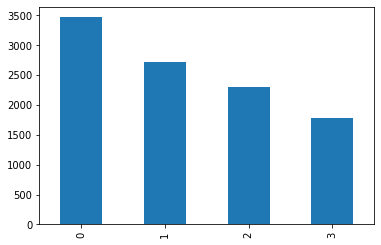

In [ ]:
df_tcu.classe.value_counts().plot(kind='bar')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_tcu.texto, df_tcu.classe, test_size=0.2, 
                                                    stratify=df_tcu.classe,random_state=42)

In [ ]:
X_train[:10]

3965    Não se pode exigir como condição de habilitaçã...
1976    A Administração, em respeito à transparência e...
1253    O encaminhamento de representação ao TCU, sem ...
4818    Havendo alteração nos pressupostos de fato que...
2126    No pregão, o exame do registro da intenção de ...
3107    No gerenciamento de ata de registro de preços,...
3739    É inconstitucional o Decreto 2.745/1998 e o ar...
1989    As entidades do Sistema S não se sujeitam à es...
9522    A atuação de gestor com base em parecer técnic...
7262    Há impossibilidade da percepção de anuênios pe...
Name: texto, dtype: object

In [ ]:
print('TREINO : ',y_train.shape,'\n', y_train.value_counts(normalize=True),'\n')
print('TESTE  : ',y_test.shape,'\n', y_test.value_counts(normalize=True))

2020-07-24 03:31:48,795 INFO Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2020-07-24 03:31:48,796 INFO NumExpr defaulting to 8 threads.


TREINO :  (8210,) 
 0    0.337881
1    0.265286
2    0.223873
3    0.172960
Name: classe, dtype: float64 

TESTE  :  (2053,) 
 0    0.338042
1    0.265465
2    0.223575
3    0.172918
Name: classe, dtype: float64


In [ ]:
text_train = list(X_train)
text_test = list(X_test)
text_train[:5]

['Não se pode exigir como condição de habilitação de licitante o pagamento de valor superior ao custo efetivo de reprodução gráfica do edital, sob pena de enriquecimento ilícito da Administração contratante.',
 'A Administração, em respeito à transparência e à motivação dos atos administrativos, deve explicitar as razões para a admissão ou vedação à participação de consórcios de empresas quando da contratação de objetos de maior vulto e complexidade.',
 'O encaminhamento de representação ao TCU, sem que o órgão fiscalizado tenha oportunidade de se manifestar, caracteriza <i>erro in procedendo</i>, prejudicando o mérito da decisão.',
 'Havendo alteração nos pressupostos de fato que fundamentaram decisão judicial transitada em julgado que reconheceu a servidor o direito a determinado acréscimo remuneratório, a eficácia do julgado cessa de imediato, independentemente de ação rescisória.',
 'No pregão, o exame do registro da intenção de recurso deve limitar-se à verificação dos requisitos 

In [ ]:
target_train = list(y_train)
target_test = list(y_test)
print(target_test[:5])

[3, 3, 0, 2, 0]


In [ ]:
# Define a pipeline combining a text feature extractor with a simple classifier
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='log')), # default hinge. to get proba=log or modified_huber
])

In [ ]:
# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    #
    'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    #
    'tfidf__use_idf': (True, False),
    #
    'tfidf__norm': ('l1', 'l2'),
    'clf__max_iter': (20,),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
    #
    'clf__max_iter': (10, 50, 80),
}

In [ ]:
if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1,cv=3)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    
    grid_search.fit(text_train, target_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__alpha': (1e-05, 1e-06),
 'clf__max_iter': (10, 50, 80),
 'clf__penalty': ('l2', 'elasticnet'),
 'tfidf__norm': ('l1', 'l2'),
 'tfidf__use_idf': (True, False),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (None, 5000, 10000, 50000),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 3 folds for each of 1152 candidates, totalling 3456 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1238 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1788 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2438 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 3188 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed:  5.2min finished


done in 312.232s

Best score: 0.950
Best parameters set:
	clf__alpha: 1e-06
	clf__max_iter: 50
	clf__penalty: 'l2'
	tfidf__norm: 'l2'
	tfidf__use_idf: True
	vect__max_df: 0.75
	vect__max_features: None
	vect__ngram_range: (1, 2)


In [ ]:
grid_search.best_estimator_.predict(text_test)

array([3, 3, 0, ..., 0, 3, 0])

In [ ]:
prob_preds= grid_search.best_estimator_.predict_proba(text_test)
prob_preds[:10]

array([[3.75158911e-05, 3.98210087e-05, 1.94968263e-03, 9.97972980e-01],
       [1.18136667e-01, 3.91944536e-04, 3.37293969e-02, 8.47741992e-01],
       [9.90769586e-01, 4.07382143e-03, 3.78146696e-03, 1.37512539e-03],
       [4.75453611e-04, 4.20663829e-03, 9.92248715e-01, 3.06919323e-03],
       [9.94208630e-01, 5.25951236e-03, 2.03688473e-04, 3.28169014e-04],
       [1.01842777e-01, 8.11754840e-01, 7.37871789e-04, 8.56645112e-02],
       [9.90892274e-01, 7.90405243e-04, 7.87286206e-03, 4.44458569e-04],
       [1.79736193e-03, 8.32924497e-03, 6.20394553e-03, 9.83669448e-01],
       [9.96228137e-01, 1.59523842e-03, 6.33315499e-04, 1.54330896e-03],
       [1.01685331e-03, 9.93022118e-01, 6.62553263e-04, 5.29847524e-03]])

In [ ]:
df_test = pd.DataFrame(columns=['texto','predicted', 'prob_0','prob_1','prob_2','prob_3'])
df_test['texto'] = text_test
df_test['predicted'] = grid_search.best_estimator_.predict(text_test)
df_test['prob_0'] = prob_preds[0:,0].tolist()
df_test['prob_1'] = prob_preds[0:,1].tolist()
df_test['prob_2'] = prob_preds[0:,2].tolist()
df_test['prob_3'] = prob_preds[0:,3].tolist()

In [ ]:
print(df_test.shape)
df_test.head()

(2053, 6)


,texto,predicted,prob_0,prob_1,prob_2,prob_3
0,"Não cabe ao TCU, a pedido do responsável, real...",3,0.000038,0.000040,0.001950,0.997973
1,Não há amparo legal para condicionar o julgame...,3,0.118137,0.000392,0.033729,0.847742
2,"Considera-se prejudicada, por perda de objeto,...",0,0.990770,0.004074,0.003781,0.001375
3,O TCU pode desconsiderar a personalidade juríd...,2,0.000475,0.004207,0.992249,0.003069
4,"É ilegal o pagamento de vantagem pessoal, com ...",0,0.994209,0.005260,0.000204,0.000328


In [ ]:
df_test.to_csv('tcu_tfidf_all_predictions_probs.csv', index=None)

In [ ]:
# target_test

In [ ]:
grid_search.best_estimator_.predict(text_test) == target_test

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
sum(grid_search.best_estimator_.predict(text_test) == target_test)/len(target_test)

0.9590842669264491

In [ ]:
grid_search.best_estimator_.score(text_test, target_test)

0.9590842669264491

In [ ]:
p = grid_search.best_estimator_.predict(text_test)
y = target_test

In [ ]:
from sklearn.metrics import f1_score
f1_score(y, p, average='weighted') 

0.9589655379737931

[[680   6   5   3]
 [  2 537   4   2]
 [  5  11 425  18]
 [  5   5  18 327]]


/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=[0, 1, 2, 3] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


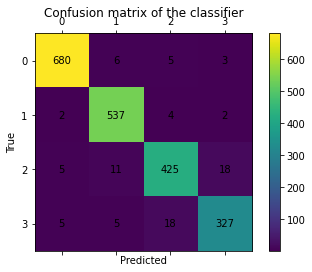

In [ ]:
# Gerando Matriz de Confusão
# https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/48018785

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.cm as cm

labels = [0,1,2,3]
#tlabels = list(target_test.map({0:'direito', 1:'economia', 2:'social', 3: ''}))
cm = confusion_matrix(y, p, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)

plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
for x in range(len(cm)):
    for z in range(len(cm)):
        plt.annotate(str(cm[x][z]), xy=(z, x),
                    horizontalalignment='center',
                    verticalalignment='center')
plt.cm.Blues
plt.show()

In [ ]:
# Salvando o modelo para posterior reuso
dump(grid_search.best_estimator_, 'modelo_tf-idf_sklearn_tcu_jurisp.pkl')

['modelo_tf-idf_sklearn_tcu_jurisp.pkl']

In [ ]:
# Carregar o modelo do disco
loaded_model = load('modelo_tf-idf_sklearn_tcu_jurisp.pkl')

In [ ]:
# usar o modelo carregado para inferência.
result = loaded_model.score(text_test, target_test)
result

0.9590842669264491

### FIM